In [1]:
# These is shell command used to set up kaggle api access within notebook

# creating .kaggle directory inside home directory(~)
# -p flag used to create any necessary parent directory if didn't exist
!mkdir -p ~/.kaggle

# It will copy our kaggle api file (kaggle.json) and paste it to .kaggle destination
!cp kaggle.json ~/.kaggle/

In [2]:
# (!) tells notebook to run this command on system cell,(treated as shell command)
# -d defines the identifiers,
# in this case salader/dogs-vs-cats  is the identifier,
# where salader is the user name , and rest is the dataset name
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 43.0MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.4MB/s]


In [3]:
import zipfile
# this will open the zip file for reading ('r')
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
#extract the content of zip file into dataset directory
zip_ref.extractall('/content/dataset')
zip_ref.close()

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout


In [21]:
# Using generators ( to divide dataset into different batches (samples))

train_dataset = keras.utils.image_dataset_from_directory(
    # dataset directory
    directory = '/content/dataset/train',
    # It will automatically labeled (give names) to each images,
    # on the basis of subdirectory on which these images are presented
    labels = "inferred",
    # label ( output) result will be in integer
    label_mode = 'int',
    # no. of batches
    batch_size = 32,
    # defining fixed, same size for all images
    image_size = (256, 256)
)

# for validation dataset
validation_test = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/test',
    labels = "inferred",
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [22]:
# Normalizing our dataset into 0 or 1

def process(image, label):
  # dividing image tensor by 255 , which scales the pixels values between 0 and 1
  image = tf.cast(image/255., tf.float32)
  return image, label

# map() used to apply process f() to each element of dataset
train_dataset = train_dataset.map(process)
validation_test = validation_test.map(process)


In [23]:
# Creating CNN MODEL:-

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))




In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_test)

Epoch 1/10
625/625 [==============================] - 61s 94ms/step - loss: 0.6530 - accuracy: 0.6087 - val_loss: 0.5424 - val_accuracy: 0.7430
Epoch 2/10
625/625 [==============================] - 52s 83ms/step - loss: 0.4984 - accuracy: 0.7552 - val_loss: 0.4631 - val_accuracy: 0.7984
Epoch 3/10
625/625 [==============================] - 58s 93ms/step - loss: 0.3867 - accuracy: 0.8253 - val_loss: 0.4596 - val_accuracy: 0.7874
Epoch 4/10
625/625 [==============================] - 52s 82ms/step - loss: 0.2686 - accuracy: 0.8861 - val_loss: 0.5544 - val_accuracy: 0.7788
Epoch 5/10
625/625 [==============================] - 52s 82ms/step - loss: 0.1571 - accuracy: 0.9387 - val_loss: 0.7268 - val_accuracy: 0.8000
Epoch 6/10
625/625 [==============================] - 51s 82ms/step - loss: 0.0918 - accuracy: 0.9657 - val_loss: 0.9139 - val_accuracy: 0.7884
Epoch 7/10
625/625 [==============================] - 57s 90ms/step - loss: 0.0588 - accuracy: 0.9802 - val_loss: 1.0549 - val_accuracy:

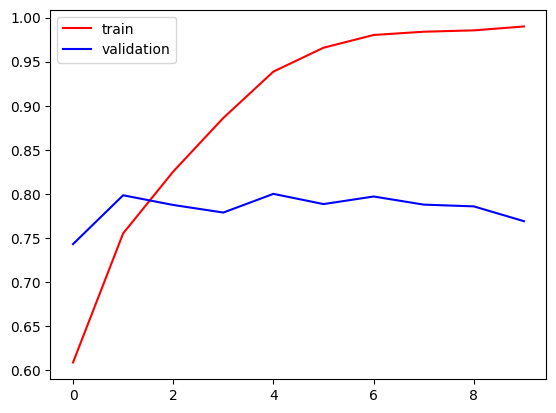

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

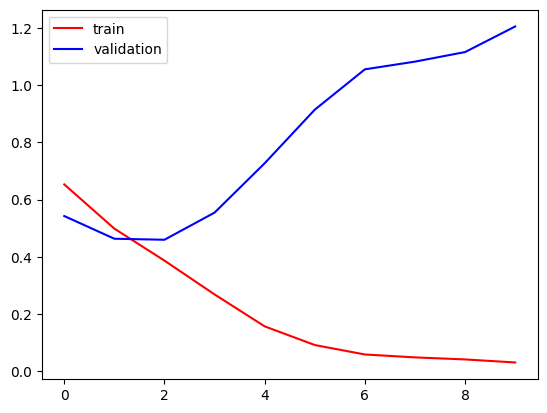

In [28]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [29]:
# optimizing the code :-

In [30]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(train_dataset,epochs=10,validation_data=validation_test)

Epoch 1/10
625/625 [==============================] - 67s 102ms/step - loss: 1.3372 - accuracy: 0.6019 - val_loss: 0.6351 - val_accuracy: 0.6758
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5902 - accuracy: 0.6941 - val_loss: 0.5316 - val_accuracy: 0.7374
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.5074 - accuracy: 0.7538 - val_loss: 0.6811 - val_accuracy: 0.5526
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4495 - accuracy: 0.7929 - val_loss: 0.5300 - val_accuracy: 0.7440
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3855 - accuracy: 0.8251 - val_loss: 0.5263 - val_accuracy: 0.7410
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3053 - accuracy: 0.8691 - val_loss: 0.5809 - val_accuracy: 0.7332
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2350 - accuracy: 0.9035 - val_loss: 0.6019 - val_ac

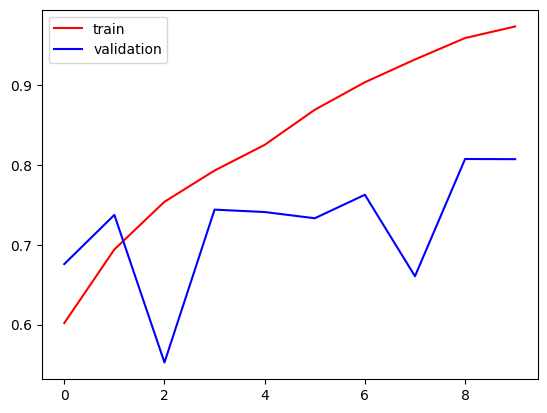

In [34]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

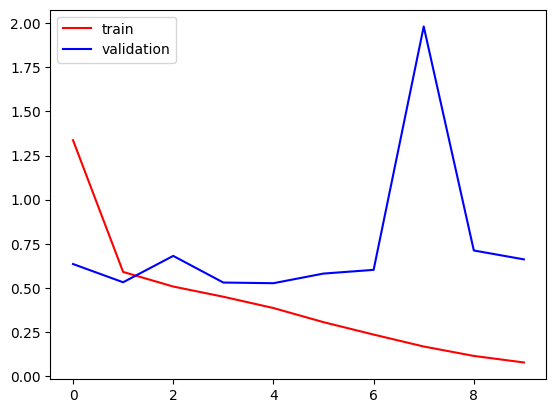

In [35]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()